<a href="https://colab.research.google.com/github/Alexis-CAPON/cse437-reinforcement-learning/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [1]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -694
Episode 2: total reward = -892
Episode 3: total reward = -694
Episode 4: total reward = -1486
Episode 5: total reward = -991


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [2]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 3000      # number of episodes to run
max_steps = 100    # safety cap
epsilon = 0.1

sumOfRewardSARSA = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

def best_action(state, Q):
  return np.argmax(Q[state])

def epsilon_greedy_policy(state, Q):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return best_action(state, Q)

for episode in range(n_episodes):
  step = 0
  state, info = env.reset()
  terminated = False
  action = epsilon_greedy_policy(state, Q)
  sumReward = 0

  while (step < max_steps and terminated!= True):
    next_state, reward, terminated, truncated, info = env.step(action)
    next_action = epsilon_greedy_policy(next_state, Q)
    sumReward += reward

    Q[state][action] = Q[state][action] + learning_rate * (reward + discount_factor*Q[next_state][next_action] - Q[state][action])
    state = next_state
    action = next_action
    step+=1

  sumOfRewardSARSA.append(sumReward)





In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

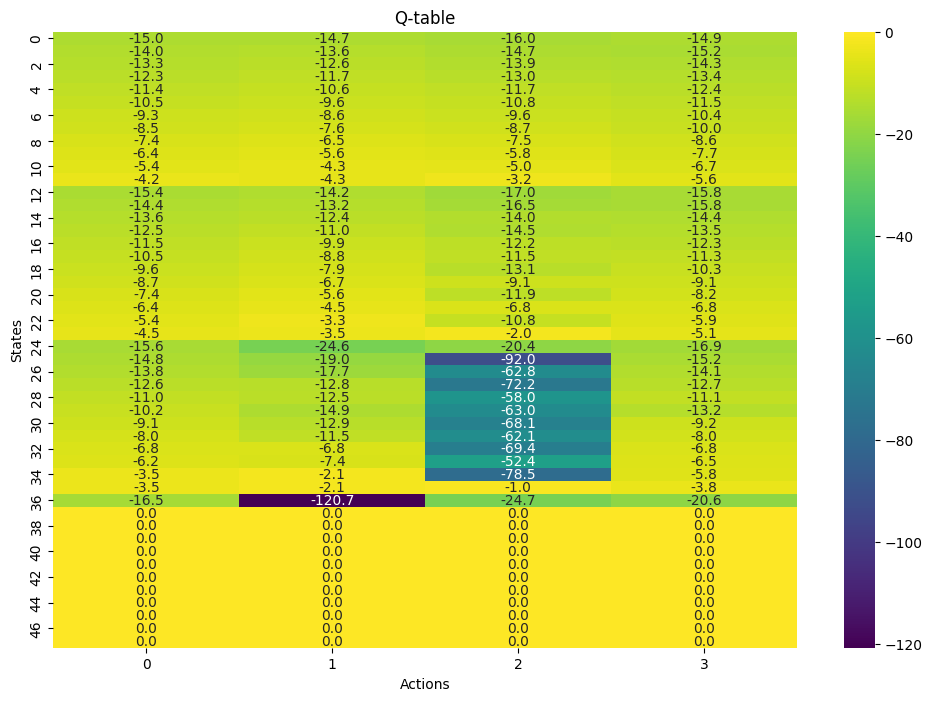

In [4]:
plot_Q(Q)

In [5]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy:"+ str(title))
  plt.show()


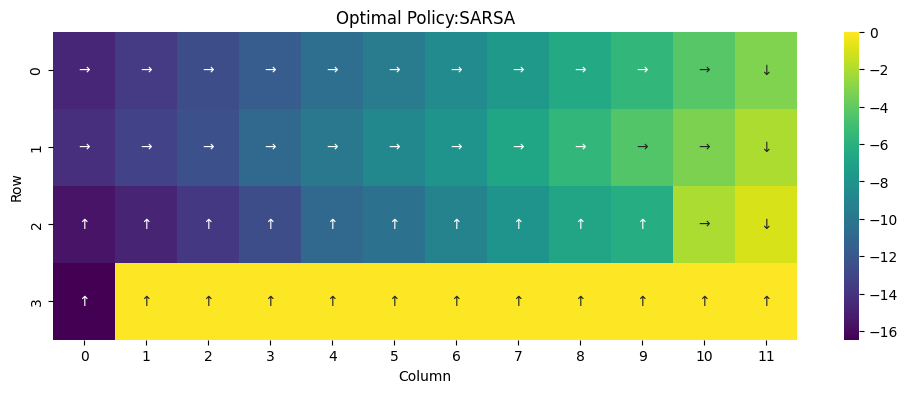

In [6]:
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [7]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100    # safety cap
epsilon = 0.01
sumOfRewardQLearning = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q_2 = np.zeros((n_states, n_actions))

def best_action(state, Q_2):
  return np.argmax(Q_2[state])

def epsilon_greedy_policy(state, Q_2):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return best_action(state, Q_2)

for episode in range(n_episodes):
  step = 0
  state, info = env.reset()
  terminated = False
  sumReward = 0
  while (step < max_steps and terminated!= True):
    action = epsilon_greedy_policy(state, Q_2)
    next_state, reward, terminated, truncated, info = env.step(action)
    sumReward += reward

    Q_2[state][action] = Q_2[state][action] + learning_rate * (reward + discount_factor* np.max(Q_2[next_state]) - Q_2[state][action])
    state = next_state
    step+=1

  sumOfRewardQLearning.append(sumReward)





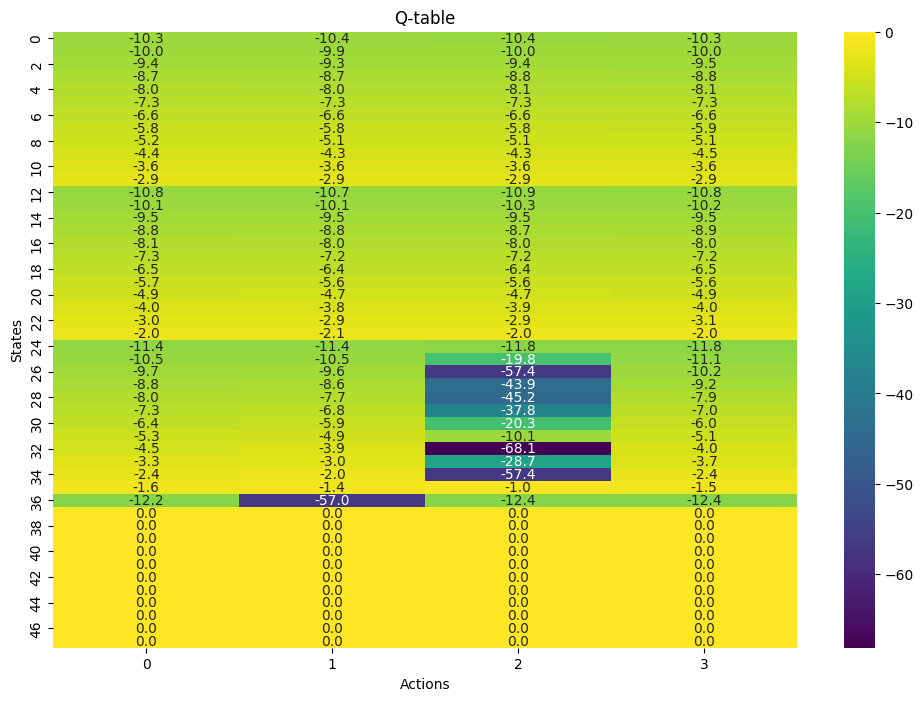

In [8]:
plot_Q(Q_2)

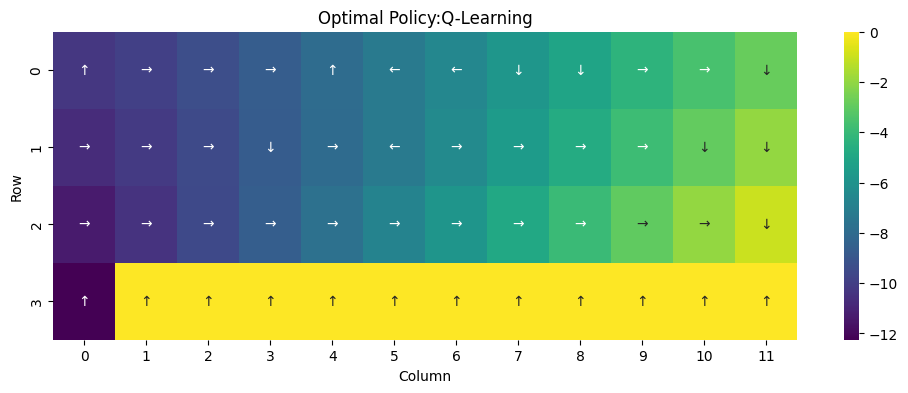

In [9]:
plot_policy(Q_2, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


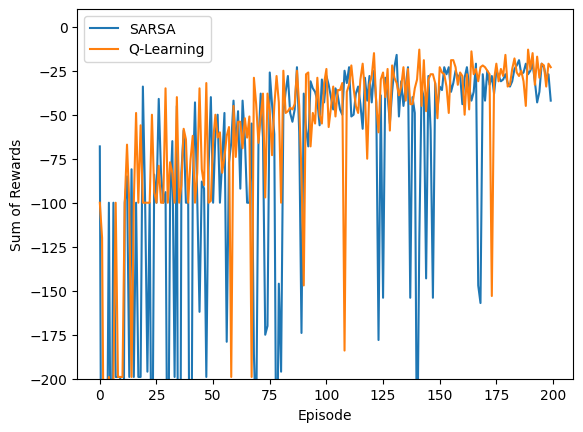

In [10]:
plt.plot(sumOfRewardSARSA[:200], label="SARSA")
plt.plot(sumOfRewardQLearning[:200], label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Sum of Rewards")
plt.ylim(-200, 10)  # Set the y-axis limit
plt.legend()
plt.show()

In [11]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 3000      # number of episodes to run
max_steps = 100    # safety cap
epsilon = 0.1
slippery= True

sumOfRewardSARSASlippery = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

def best_action(state, Q):
  return np.argmax(Q[state])

def epsilon_greedy_policy(state, Q):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return best_action(state, Q)

for episode in range(n_episodes):
  step = 0
  state, info = env.reset(options={"is_slippery":slippery})
  terminated = False
  action = epsilon_greedy_policy(state, Q)
  sumReward = 0

  while (step < max_steps and terminated!= True):
    next_state, reward, terminated, truncated, info = env.step(action)
    next_action = epsilon_greedy_policy(next_state, Q)
    sumReward += reward

    Q[state][action] = Q[state][action] + learning_rate * (reward + discount_factor*Q[next_state][next_action] - Q[state][action])
    state = next_state
    action = next_action
    step+=1

  sumOfRewardSARSASlippery.append(sumReward)





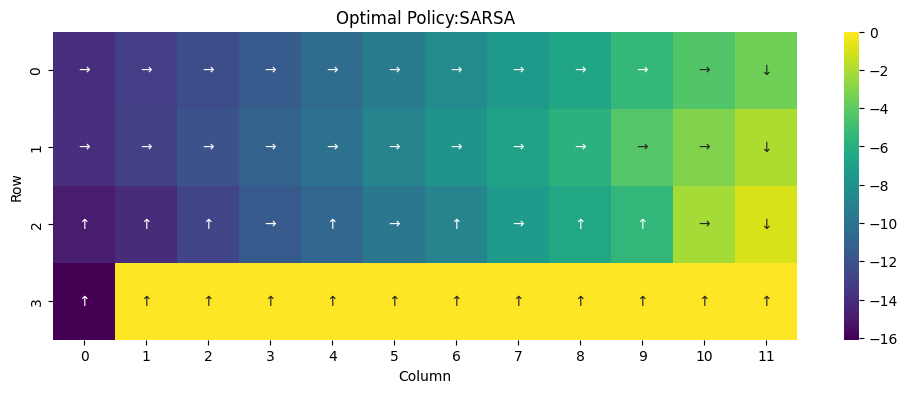

In [12]:
plot_policy(Q)

In [13]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100    # safety cap
epsilon = 0.01
sumOfRewardQLearningSlippery = []
slippery = True

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q_2 = np.zeros((n_states, n_actions))

def best_action(state, Q_2):
  return np.argmax(Q_2[state])

def epsilon_greedy_policy(state, Q_2):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return best_action(state, Q_2)

for episode in range(n_episodes):
  step = 0
  state, info = env.reset(options={"is_slippery":slippery})
  terminated = False
  sumReward = 0
  while (step < max_steps and terminated!= True):
    action = epsilon_greedy_policy(state, Q_2)
    next_state, reward, terminated, truncated, info = env.step(action)
    sumReward += reward

    Q_2[state][action] = Q_2[state][action] + learning_rate * (reward + discount_factor* np.max(Q_2[next_state]) - Q_2[state][action])
    state = next_state
    step+=1

  sumOfRewardQLearningSlippery.append(sumReward)





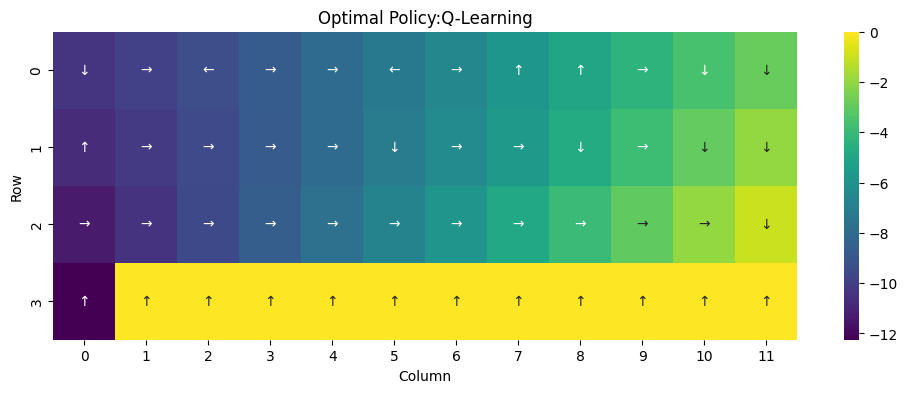

In [14]:
plot_policy(Q_2, "Q-Learning")

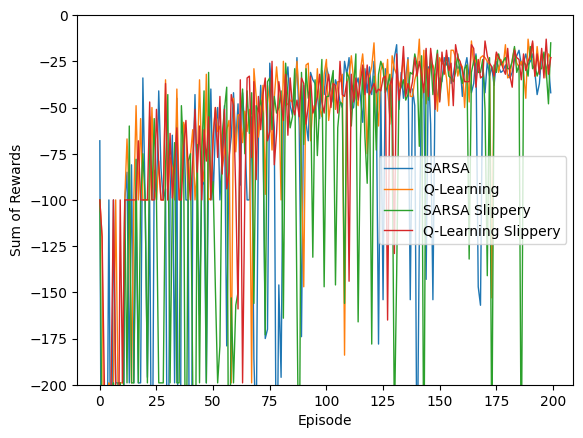

[-68, -397, -298, -298, -100, -298, -100, -199, -199, -199, -397, -100, -85, -199, -81, -199, -100, -199, -199, -34, -100, -196, -100, -298, -84, -100, -41, -83, -100, -94, -298, -100, -65, -199, -45, -496, -83, -59, -100, -100, -397, -92, -43, -98, -162, -88, -92, -199, -80, -40, -100, -61, -50, -100, -76, -49, -179, -77, -66, -42, -68, -48, -92, -42, -63, -100, -100, -55, -186, -230, -67, -38, -63, -175, -170, -26, -44, -61, -282, -146, -196, -49, -37, -28, -49, -54, -47, -23, -60, -174, -38, -58, -68, -31, -35, -37, -42, -56, -30, -43, -28, -33, -40, -47, -35, -39, -47, -50, -25, -32, -23, -51, -50, -38, -34, -44, -58, -29, -42, -28, -43, -25, -43, -178, -39, -154, -29, -39, -55, -37, -23, -16, -51, -31, -45, -34, -23, -154, -40, -49, -258, -121, -35, -40, -143, -28, -59, -154, -32, -47, -34, -36, -23, -27, -23, -37, -32, -25, -29, -27, -44, -29, -23, -34, -42, -37, -21, -147, -157, -27, -42, -25, -33, -28, -38, -25, -28, -31, -30, -27, -32, -34, -31, -24, -22, -19, -27, -26, -21, -

In [15]:
plt.plot(sumOfRewardSARSA[:200], label="SARSA", linewidth=1) # Reduced linewidth
plt.plot(sumOfRewardQLearning[:200], label="Q-Learning", linewidth=1) # Reduced linewidth
plt.plot(sumOfRewardSARSASlippery[:200], label="SARSA Slippery", linewidth=1) # Reduced linewidth
plt.plot(sumOfRewardQLearningSlippery[:200], label="Q-Learning Slippery", linewidth=1) # Reduced linewidth
plt.xlabel("Episode")
plt.ylabel("Sum of Rewards")
plt.ylim(-200, 0)  # Set the y-axis limit
plt.legend()
plt.show()

print(sumOfRewardSARSA)
print(sumOfRewardQLearning)
print(sumOfRewardSARSASlippery)
print(sumOfRewardQLearningSlippery)

With is_slippery=True parameter, the results are quite more difficult to reach a good learning. Its because of the randomness of the slippery that will make move on left or right with a little probability when we want to move forward. So it's normal behavior, however we see that the 2 algorithm handle pretty well the slippery after a few episodes

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [16]:
!pip install gym_simplegrid

In [17]:
def plot_policy2(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((8, 8, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy:"+ str(title))
  plt.show()


Episode : 0


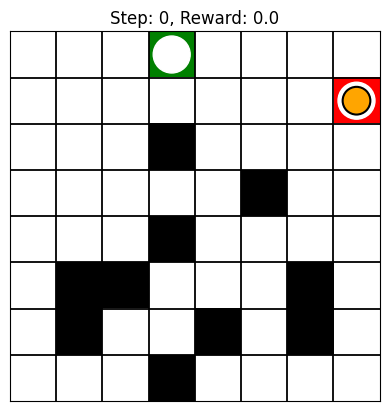

Episode : 1
Episode : 2
Episode : 3
Episode : 4
Episode : 5
Episode : 6
Episode : 7
Episode : 8
Episode : 9
Episode : 10
Episode : 11
Episode : 12
Episode : 13
Episode : 14
Episode : 15
Episode : 16
Episode : 17
Episode : 18
Episode : 19
Episode : 20
Episode : 21
Episode : 22
Episode : 23
Episode : 24
Episode : 25
Episode : 26
Episode : 27
Episode : 28
Episode : 29
Episode : 30
Episode : 31
Episode : 32
Episode : 33
Episode : 34
Episode : 35
Episode : 36
Episode : 37
Episode : 38
Episode : 39
Episode : 40
Episode : 41
Episode : 42
Episode : 43
Episode : 44
Episode : 45
Episode : 46
Episode : 47
Episode : 48
Episode : 49
Episode : 50
Episode : 51
Episode : 52
Episode : 53
Episode : 54
Episode : 55
Episode : 56
Episode : 57
Episode : 58
Episode : 59
Episode : 60
Episode : 61
Episode : 62
Episode : 63
Episode : 64
Episode : 65
Episode : 66
Episode : 67
Episode : 68
Episode : 69
Episode : 70
Episode : 71
Episode : 72
Episode : 73
Episode : 74
Episode : 75
Episode : 76
Episode : 77
Episode 

In [20]:
import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}
sumsOfRewardQLearning8x8 = []
# Create the environment
env = gym.make('SimpleGrid-8x8-v0', render_mode='human')

n_episodes = 200      # Increased number of episodes
max_steps = 50    # Increased max steps per episode
epsilon = 0.1

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q4 = np.zeros((n_states, n_actions))

def best_action(state, Q4):
  return np.argmax(Q4[state])

def epsilon_greedy_policy(state, Q4):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return best_action(state, Q4)

for episode in range(n_episodes):
  print("Episode : " +str(episode))
  step = 0
  state, info = env.reset(seed=1, options=options)
  terminated = False
  sums = 0

  while (step < max_steps and terminated!= True):
    action = epsilon_greedy_policy(state, Q4)
    next_state, reward, terminated, truncated, info = env.step(action)

    Q4[state][action] = Q4[state][action] + learning_rate * (reward + discount_factor*np.max(Q4[next_state]) - Q4[state][action])
    state = next_state
    step+=1
    sums += reward

  sumsOfRewardQLearning8x8.append(sums)

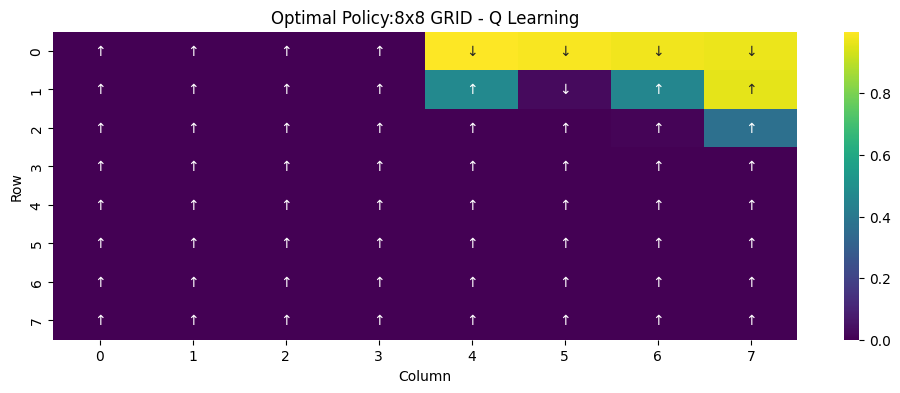

In [19]:
plot_policy2(Q4, "8x8 GRID - Q Learning")

[-2.0, -1.0, -3.0, 0.0, -1.0, -2.0, 0.0, -2.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, -4.0, -2.0, 0.0, -3.0, -1.0, -2.0, -1.0, -2.0, -3.0, -1.0, 0.0, 0.0, -3.0, -1.0, -2.0, 1.0, -4.0, 0.0, 1.0, -2.0, 0.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.

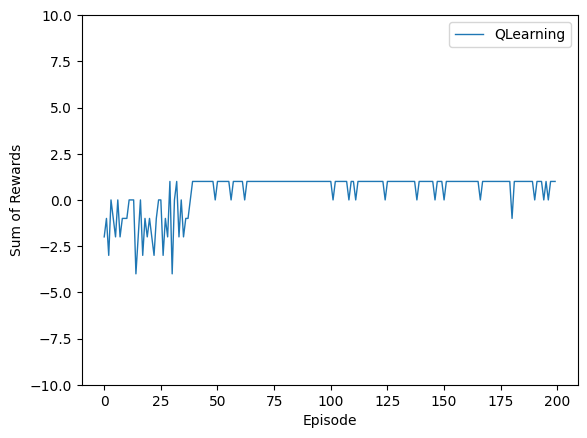

In [23]:
print(sumsOfRewardQLearning8x8)
plt.plot(sumsOfRewardQLearning8x8[:200], label="QLearning", linewidth=1) # Reduced linewidth
plt.xlabel("Episode")
plt.ylabel("Sum of Rewards")
plt.ylim(-10, 10)  # Set the y-axis limit
plt.legend()
plt.show()

**How many episodes does it need to learn the optimal policy?**



It took arround 40 episodes with Q learning to learn the optimal policy